In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Text(0.5,0,u'$x_1$')

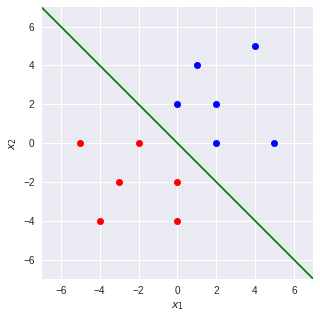

In [108]:
data = np.zeros((12,2))

# Label 1
data[0] = [0,2]
data[1] = [2,0]
data[2] = [1,4]
data[3] = [5,0]
data[4] = [4,5]
data[5] = [2,2]
#Label -1
data[6] = [-2,0]
data[7] = [0,-2]
data[8] = [0,-4]
data[9] = [-5,0]
data[10] = [-3,-2]
data[11] = [-4,-4]

labels = np.zeros((1,12))
labels[0, :6] = 1
labels[0, 6:] = -1

x = np.arange(-7, 8)
plt.figure(figsize=(5,5))
plt.plot(data[:6,0], data[:6,1], 'bo', data[6:,0], data[6:,1], 'ro', x, -x, 'g-')
plt.axis((-7, 7, -7, 7))
plt.gca().set_aspect('equal', adjustable='box')
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

In [0]:
def ConvNN(data, learning_rate, n_iter):
  # X is the placeholder for the input dataset.
  X = tf.placeholder(tf.float32, shape=data.shape)
  # Y is the placeholder for the true classification values.
  Y = tf.placeholder(tf.float32, shape=labels.shape)
  W = tf.Variable(tf.truncated_normal([10,1], stddev=0.01, dtype=tf.float32), dtype=tf.float32)
  
  input_layer = tf.reshape(X, [-1, 1, 2, 1])
  
  conv = tf.layers.conv2d(
      inputs=input_layer,
      filters=10,
      kernel_size=[1, 2],
      padding="valid",
      kernel_initializer=tf.contrib.layers.xavier_initializer())
  
  conv_flat = tf.reshape(conv, [-1, 10])
  result = tf.matmul(conv_flat, W)
  
#   result = tf.layers.dense(inputs=tf.reshape(conv, [-1, 10]), units=1, kernel_initializer=tf.contrib.layers.xavier_initializer())
  
  # Computing the loss, the sum of losses of all training examples.
  loss = tf.reduce_sum(tf.log(1+tf.exp(-Y*result)))
  
  # Defining the gradient descent optimizer.
  optimizer = tf.train.GradientDescentOptimizer(learning_rate)
  train = optimizer.minimize(loss)
  
  # Initializing the tensorflow session.
  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  result_loss = []
  NN_output = []
  feed_data = {X: data, Y: labels}
  
  print(sess.run(tf.shape(result), feed_dict=feed_data))

  for i in range(n_iter):
    # Training iteration, Grad. Descent step.
    sess.run(train, feed_dict=feed_data)
    # Tracking loss values
    result_loss.append(sess.run(loss, feed_dict=feed_data))
    # Tracking the current output of the NN for all training samples.
    NN_output.append(sess.run(result, feed_dict=feed_data))

    if i%500 == 0:
      print '\r ' + str(i) + ' out of ' + str(n_iter) + ' loss: ' + str(result_loss[-1]),
  print
  return result_loss, NN_output

In [143]:
result_loss, NN_output = ConvNN(data, 0.001, 5*10**4)

[12  1]
 49500 out of 50000 loss: 99.81322


In [141]:
result_loss[-1]

99.81322